In [1]:
import csv
import os
import pandas as pd 
import random
import numpy as np
from datetime import datetime
from dateutil.parser import parse

In [2]:
trainPath = "/media/urmil/Windows8_OS/Masters/DSF/all/train.csv"
testPath = "/media/urmil/Windows8_OS/Masters/DSF/all/test.csv"

train = pd.read_csv(trainPath)
train.columns = ['key', 'fare_amount' , 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude' ,\
                 'dropoff_latitude', 'passenger_count']
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], infer_datetime_format=False)
train['year'] = train.pickup_datetime.apply(lambda t: t.year)
train['month'] = train.pickup_datetime.apply(lambda t: t.month)
train['date'] = train.pickup_datetime.apply(lambda t: t.day)
train['hour'] = train.pickup_datetime.apply(lambda t: t.hour)
train['weekday'] = train.pickup_datetime.apply(lambda t: t.weekday())
train = train.round({'pickup_latitude': 3, 'pickup_longitude': 3, 'dropoff_latitude': 3, 'dropoff_longitude': 3})

test = pd.read_csv(testPath)
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], infer_datetime_format=False)
test['year'] = test.pickup_datetime.apply(lambda t: t.year)
test['month'] = test.pickup_datetime.apply(lambda t: t.month)
test['date'] = test.pickup_datetime.apply(lambda t: t.day)
test['hour'] = test.pickup_datetime.apply(lambda t: t.hour)
test['weekday'] = test.pickup_datetime.apply(lambda t: t.weekday())
test = test.round({'pickup_latitude': 3, 'pickup_longitude': 3, 'dropoff_latitude': 3, 'dropoff_longitude': 3})
# print("train")
# print(train.head())
# print("test")
# print(test.head())
# print(len(test))

train
                            key  fare_amount     pickup_datetime  \
0   2012-09-10 19:57:39.0000004          8.0 2012-09-10 19:57:39   
1   2011-01-10 18:46:49.0000004          7.3 2011-01-10 18:46:49   
2  2011-09-07 08:15:00.00000069          7.3 2011-09-07 08:15:00   
3   2014-11-14 16:03:51.0000002          9.0 2014-11-14 16:03:51   
4   2012-01-24 19:32:45.0000001          8.9 2012-01-24 19:32:45   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0           -73.994           40.729            -73.992            40.749   
1           -73.983           40.777            -73.962            40.774   
2           -73.993           40.758            -73.994            40.751   
3           -73.995           40.718            -73.980            40.725   
4           -74.005           40.707            -73.975            40.733   

   passenger_count  year  month  date  hour  weekday  
0                1  2012      9    10    19        0  
1           

In [3]:
#finding the boundary of the New York city
latitude = test["pickup_latitude"].tolist()
latitude.extend(test["dropoff_latitude"].tolist())
longitude = test["pickup_longitude"].tolist()
longitude.extend(test["dropoff_longitude"].tolist())
min_lat = round(min(latitude), 3)
max_lat = round(max(latitude), 3)
min_long = round(min(longitude), 3)
max_long = round(max(longitude), 3)
print(min_lat, max_lat)
print(min_long, max_long)

train = train.drop(train[(train.fare_amount <= 0) | (train.fare_amount >= 250) | (train.passenger_count == 0) | \
                        (train.pickup_longitude >= max_long) | (train.pickup_longitude <= min_long) | \
                        (train.dropoff_longitude >= max_long) | (train.dropoff_longitude <= min_long) | \
                        (train.pickup_latitude >= max_lat) | (train.pickup_latitude <= min_lat) | \
                        (train.dropoff_latitude >= max_lat) | (train.dropoff_latitude <= min_lat)].index)
# print(len(train))

40.569 41.71
-74.263 -72.987
487571


In [4]:
from geopy import distance
import numpy as np
pickup_lat = train['pickup_latitude']
pickup_long = train['pickup_longitude']
dropoff_lat = train['dropoff_latitude']
dropoff_long = train['dropoff_longitude']

# Calculating Euclidean Distance for the training data
distances = []
length_train = len(train)
for i in range(length_train):
    pickup = (train.iloc[i]['pickup_latitude'], train.iloc[i]['pickup_longitude'])
    dropoff = (train.iloc[i]['dropoff_latitude'], train.iloc[i]['dropoff_longitude'])
    distances.append(round(distance.distance(pickup,dropoff).miles, 3))
distance_column = pd.Series(distances)
train.reset_index(drop=True, inplace=True)
distance_column.reset_index(drop=True, inplace=True)
train['distance'] = distance_column
i = 0
while i < len(train):
    if train.iloc[i]['distance'] == 0:
        train = train.drop(train.index[i])
    else:
        i += 1
# print(train.head())

# Calculating Euclidean Distance for the testing data
distances = []
length_test = len(test)
for i in range(length_test):
    pickup = (test.iloc[i]['pickup_latitude'], test.iloc[i]['pickup_longitude'])
    dropoff = (test.iloc[i]['dropoff_latitude'], test.iloc[i]['dropoff_longitude'])
    distances.append(round(distance.distance(pickup,dropoff).miles, 3))
distance_column = pd.Series(distances)
test.reset_index(drop=True, inplace=True)
distance_column.reset_index(drop=True, inplace=True)
test['distance'] = distance_column
# print(test.head())



                            key  fare_amount     pickup_datetime  \
0   2012-09-10 19:57:39.0000004          8.0 2012-09-10 19:57:39   
1   2011-01-10 18:46:49.0000004          7.3 2011-01-10 18:46:49   
2  2011-09-07 08:15:00.00000069          7.3 2011-09-07 08:15:00   
3   2014-11-14 16:03:51.0000002          9.0 2014-11-14 16:03:51   
4   2012-01-24 19:32:45.0000001          8.9 2012-01-24 19:32:45   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0           -73.994           40.729            -73.992            40.749   
1           -73.983           40.777            -73.962            40.774   
2           -73.993           40.758            -73.994            40.751   
3           -73.995           40.718            -73.980            40.725   
4           -74.005           40.707            -73.975            40.733   

   passenger_count  year  month  date  hour  weekday  distance  
0                1  2012      9    10    19        0     1.384 

r =  0.8515435188096006
p-value =  0.0
r^2 =  0.7251263644266366


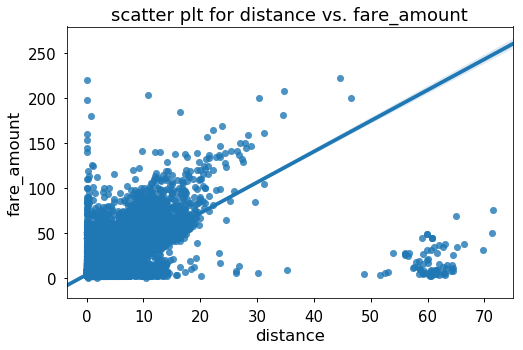

r =  -0.028019032613368685
p-value =  4.606256230769349e-84
r^2 =  0.000785066188589018


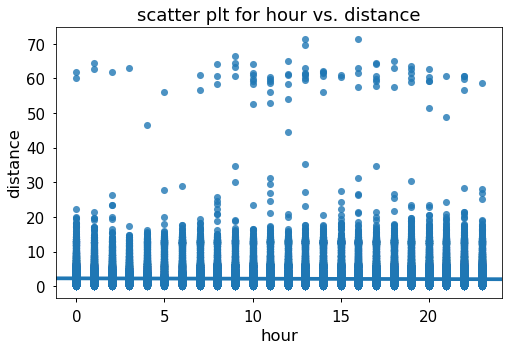

r =  -0.016442926580482964
p-value =  4.231871932282856e-30
r^2 =  0.0002703698345311532


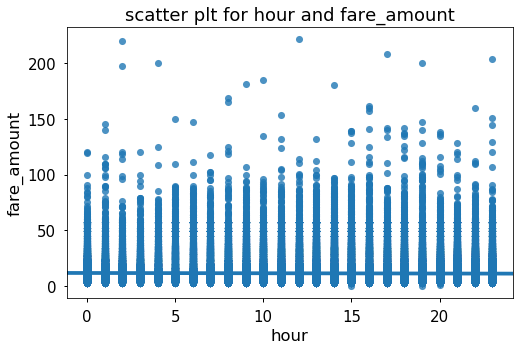

/home/urmil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


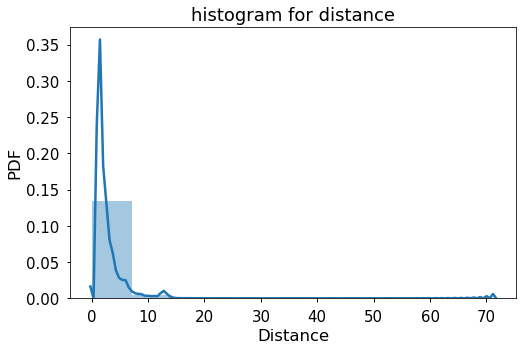

/home/urmil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


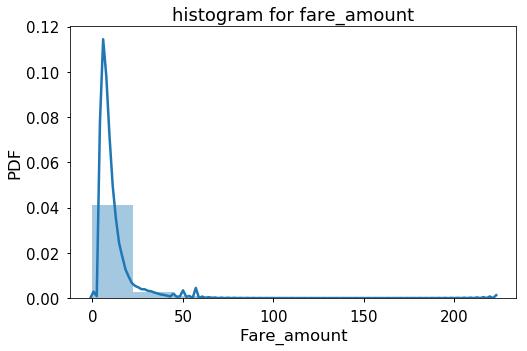

/home/urmil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


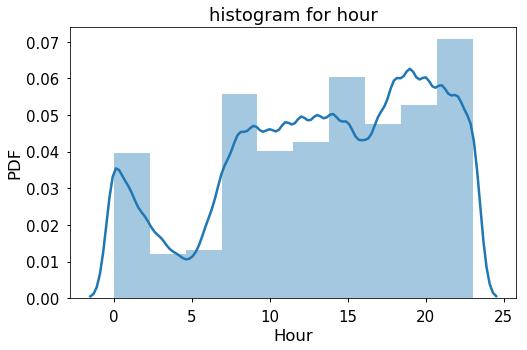

In [68]:
from scipy.stats import pearsonr
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#Pearson correlation between distance and taxi fare
r, p_value = pearsonr(train['distance'], train['fare_amount'])
print('r = ', r)
print('p-value = ',p_value)
print('r^2 = ', r*r)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x=train['distance'], y=train['fare_amount'], scatter_kws={"s": 50})
ax.set_title("scatter plt for distance vs. fare_amount")
fig.savefig('pearson_distance_fare.png', bbox_inches='tight')
plt.show()

#Pearson correlation between time and distance
r, p_value = pearsonr(train['hour'], train['distance'])
print('r = ', r)
print('p-value = ',p_value)
print('r^2 = ', r*r)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x=train['hour'], y=train['distance'], scatter_kws={"s": 50})
ax.set_title("scatter plt for hour vs. distance")
fig.savefig('pearson_hour_distance.png', bbox_inches='tight')
plt.show()

#Pearson correlation between time and taxi fare
r, p_value = pearsonr(train['hour'], train['fare_amount'])
print('r = ', r)
print('p-value = ',p_value)
print('r^2 = ', r*r)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x=train['hour'], y=train['fare_amount'], scatter_kws={"s": 50})
ax.set_title("scatter plt for hour and fare_amount")
fig.savefig('pearson_hour_fare.png', bbox_inches='tight')
plt.show()

#histogram of disatnce
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.distplot(train['distance'], bins=10)
ax.set_title("histogram for distance")
ax.set(xlabel='Distance', ylabel='PDF')
fig.savefig('hist_distance.png', bbox_inches='tight')
plt.show()

#histogram of fare_amount
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.distplot(train['fare_amount'], bins=10)
ax.set_title("histogram for fare_amount")
ax.set(xlabel='Fare_amount', ylabel='PDF')
fig.savefig('hist_fare.png', bbox_inches='tight')
plt.show()

#histogram of hour
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.distplot(train['hour'], bins=10)
ax.set_title("histogram for hour")
ax.set(xlabel='Hour', ylabel='PDF')
fig.savefig('hist_hour.png', bbox_inches='tight')
plt.show()


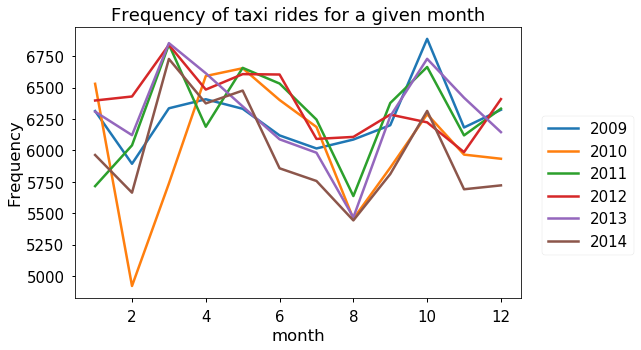

In [72]:
# calculating frequency of the taxi ride for a given time of a day
import math
traffic = {}
i = 0
length_train = len(train)
while i < 24:
    traffic[i] = 0
    i = i + 1
for i in range(length_train):
    key = train.iloc[i]['hour']
    traffic[key] += 1
    
fig, ax = plt.subplots(figsize=(8,5))
# plt.plot(traffic.keys(), traffic.values())
# plt.ylabel('Frequency')
# plt.xlabel('Time (hour)')
# plt.title('Frequency of taxi rides at a given hour of the day')
# fig.savefig('freq_time(hour).png', bbox_inches='tight')
# plt.show()

#I have not taken year 2015 into calculation as it does not have data for the months.
year_list1 = [2009, 2010, 2011, 2012, 2013, 2014]
monthwise = {}
for i in year_list1:
    monthwise[i] = {}
    for j in range(1, 13, 1):
        monthwise[i][j] = 0
for i in range(length_train):
    if train.iloc[i]['year'] == 2015:
        continue
    monthwise[train.iloc[i]['year']][train.iloc[i]['month']] += 1
    
for i in monthwise.keys():
    plt.plot(monthwise[i].keys(), monthwise[i].values(), label = i)
    plt.legend(loc=9, bbox_to_anchor=(1.15, 0.7))
plt.ylabel('Frequency')
plt.xlabel('month')
plt.title('Frequency of taxi rides for a given month')
fig.savefig('freq_month_label_year.png', bbox_inches='tight')
plt.show()

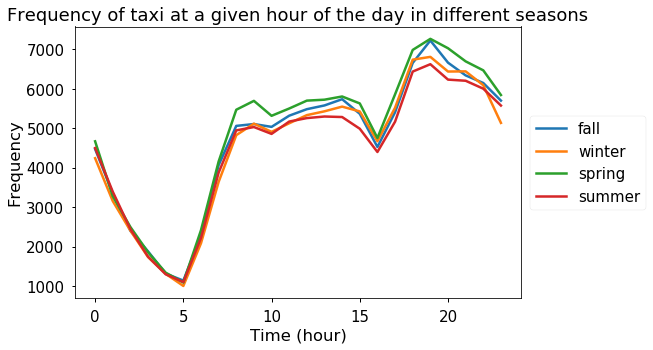

In [66]:
# calculating frequencies of the taxi rides for a given time of a day in a given season
traffic_season = {}
# mapping months to the respective seasons
fall = [9, 10, 11]
winter = [12, 1 , 2]
spring = [3, 4, 5]
summer = [6, 7, 8]
season = ['fall', 'winter', 'spring', 'summer']
i = 0
j = 0
while i < 4:
    traffic_season[i] = {}
    j = 0
    while j < 24:
        traffic_season[i][j] = 0
        j += 1
    i += 1
for i in range(len(train)):
    if train.iloc[i]['year'] == 2015:
        continue
    key1 = train.iloc[i]['month']
    if key1 in fall:
        key1 = 0
    elif key1 in winter:
        key1 = 1
    elif key1 in spring:
        key1 = 2
    else:
        key1 = 3
    key2 = train.iloc[i]['hour']
    if math.isnan(key1) or math.isnan(key2):
        print(train.iloc[i])
    traffic_season[key1][key2] += 1
    
fig, ax = plt.subplots(figsize=(8,5))
for i in traffic_season.keys():
    plt.plot(traffic_season[i].keys(), traffic_season[i].values(), label = season[i])
    plt.legend(loc=9, bbox_to_anchor=(1.15, 0.7))
    
# aa = traffic_season
# sum1 = {}
# fig, ax = plt.subplots(figsize=(8,5))
# for i in aa.keys():
#     sum1[i] = sum(aa[i].values())
# for i in aa.keys():
#     for j in aa[i]:
#         aa[i][j] = aa[i][j] / sum1[i]
# for i in aa.keys():
#     plt.plot(aa[i].keys(), aa[i].values(), label = i)
#     plt.legend(loc=9, bbox_to_anchor=(1.15, 0.7))
    
plt.ylabel('Frequency')
plt.xlabel('Time (hour)')
plt.title('Frequency of taxi at a given hour of the day in different seasons')
fig.savefig('freq_hour_label_season.png', bbox_inches='tight')
plt.show()



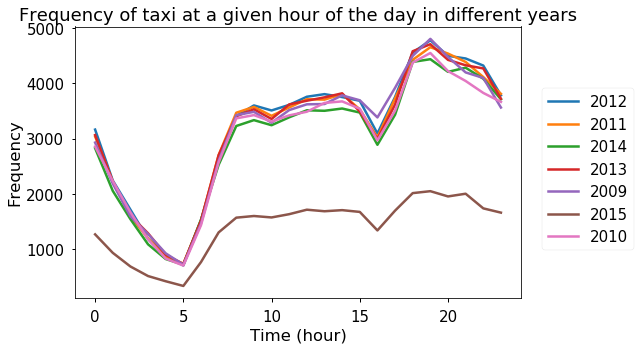

In [8]:
# Frequency of the taxi ride for a given time of a day with years
traffic_year = {}
unique_year = train['year'].unique().tolist()

for i in unique_year:
    traffic_year[i] = {}
    j = 0
    while j < 24:
        traffic_year[i][j] = 0
        j = j + 1
for i in range(length_train):
    key1 = train.iloc[i]['year']
    key2 = train.iloc[i]['hour']
    traffic_year[key1][key2] += 1

fig, ax = plt.subplots(figsize=(8,5))
for i in traffic_year.keys():
    plt.plot(traffic_year[i].keys(), traffic_year[i].values(), label = i)
#     plt.legend()
    plt.legend(loc=9, bbox_to_anchor=(1.15, 0.8))

plt.ylabel('Frequency')
plt.xlabel('Time (hour)')
plt.title('Frequency of taxi at a given hour of the day in different years')
fig.savefig('freq_hour_label_year.png', bbox_inches='tight')
plt.show()

#From the plot you can see that 2015 does not contais taxi ride infomation for the months.

In [9]:
#reference: http://www.airnav.com/airport/
#longitude and latitude of the airports
JFK = (40.6399257, -73.7786950)
Newark = (40.735657, -74.172363)
LGA = (40.7772500, -73.8726111)

#Airport flag is 1 if pickup or drop off location is in the vicinity of the airport.
#calclating manhattan distance for every ride in thetraining data
JFK_flag = []
Newark_flag = []
LGA_flag = []
manhattan_distances = []
for i in range(length_train):
    point1 = (train.iloc[i]["pickup_latitude"], train.iloc[i]["pickup_longitude"])
    point2 = (train.iloc[i]["dropoff_latitude"], train.iloc[i]["dropoff_longitude"])
    temp_point = (point2[0], point1[1])
    manhattan_distances.append(round(distance.distance(pickup,temp_point).miles, 3) + \
                               round(distance.distance(temp_point,dropoff).miles, 3))
    if distance.distance(JFK, point1).miles <= 1.5 or distance.distance(JFK, point2).miles <= 1.5:
        JFK_flag.append(1)
    else:
        JFK_flag.append(0)
    if distance.distance(Newark, point1).miles <= 1.5 or distance.distance(Newark, point2).miles <= 1.5:
        Newark_flag.append(1)
    else:
        Newark_flag.append(0)
    if distance.distance(LGA, point1).miles <= 1.5 or distance.distance(LGA, point2).miles <= 1.5:
        LGA_flag.append(1)
    else:
        LGA_flag.append(0)

manhattan_distance_column = pd.Series(manhattan_distances)
JFK_flag = pd.Series(JFK_flag)
Newark_flag = pd.Series(Newark_flag)
LGA_flag = pd.Series(LGA_flag)

train.reset_index(drop=True, inplace=True)
manhattan_distance_column.reset_index(drop=True, inplace=True)
JFK_flag.reset_index(drop=True, inplace=True)
Newark_flag.reset_index(drop=True, inplace=True)
LGA_flag.reset_index(drop=True, inplace=True)

train['manhattan_distance'] = manhattan_distance_column
train['JFK_flag'] = JFK_flag
train['Newark_flag'] = Newark_flag
train['LGA_flag'] = LGA_flag
# print(train.head())

#Airport flag is 1 if pickup or drop off location is in the vicinity of the airport.
#calclating manhattan distance for every ride in thetraining data
length_test = len(test)
JFK_flag = []
Newark_flag = []
LGA_flag = []
manhattan_distances = []
for i in range(length_test):
    point1 = (test.iloc[i]["pickup_latitude"], test.iloc[i]["pickup_longitude"])
    point2 = (test.iloc[i]["dropoff_latitude"], test.iloc[i]["dropoff_longitude"])
    temp_point = (point2[0], point1[1])
    manhattan_distances.append(round(distance.distance(pickup,temp_point).miles, 3) + \
                               round(distance.distance(temp_point,dropoff).miles, 3))
    if distance.distance(JFK, point1).miles <= 1.5 or distance.distance(JFK, point2).miles <= 1.5:
        JFK_flag.append(1)
    else:
        JFK_flag.append(0)
    if distance.distance(Newark, point1).miles <= 1.5 or distance.distance(Newark, point2).miles <= 1.5:
        Newark_flag.append(1)
    else:
        Newark_flag.append(0)
    if distance.distance(LGA, point1).miles <= 1.5 or distance.distance(LGA, point2).miles <= 1.5:
        LGA_flag.append(1)
    else:
        LGA_flag.append(0)

manhattan_distance_column = pd.Series(manhattan_distances)
JFK_flag = pd.Series(JFK_flag)
Newark_flag = pd.Series(Newark_flag)
LGA_flag = pd.Series(LGA_flag)

test.reset_index(drop=True, inplace=True)
manhattan_distance_column.reset_index(drop=True, inplace=True)
JFK_flag.reset_index(drop=True, inplace=True)
Newark_flag.reset_index(drop=True, inplace=True)
LGA_flag.reset_index(drop=True, inplace=True)

test['manhattan_distance'] = manhattan_distance_column
test['JFK_flag'] = JFK_flag
test['Newark_flag'] = Newark_flag
test['LGA_flag'] = LGA_flag
# print(test.head())
# print(len(test))

                            key  fare_amount     pickup_datetime  \
0   2012-09-10 19:57:39.0000004          8.0 2012-09-10 19:57:39   
1   2011-01-10 18:46:49.0000004          7.3 2011-01-10 18:46:49   
2  2011-09-07 08:15:00.00000069          7.3 2011-09-07 08:15:00   
3   2014-11-14 16:03:51.0000002          9.0 2014-11-14 16:03:51   
4   2012-01-24 19:32:45.0000001          8.9 2012-01-24 19:32:45   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0           -73.994           40.729            -73.992            40.749   
1           -73.983           40.777            -73.962            40.774   
2           -73.993           40.758            -73.994            40.751   
3           -73.995           40.718            -73.980            40.725   
4           -74.005           40.707            -73.975            40.733   

   passenger_count  year  month  date  hour  weekday  distance  \
0                1  2012      9    10    19        0     1.384

In [10]:
def rush_hour_flag(hour):
    if hour in range(8, 10) or hour in range(4, 9):
        return 1
    else:
        return 0
def night_surcharge_flag(hour):
    if hour in range(20, 24) or hour in range(0, 7):
        return 1
    else:
        return 0
    
def weekend_flag(weekday):
    if weekday == 0 or weekday == 6:
        return 1
    else:
        return 0
    
train['rush_hour_flag'] = train['hour'].apply(rush_hour_flag)
train['night_surcharge_flag'] = train['hour'].apply(night_surcharge_flag)
train['weekend_flag'] = train['weekday'].apply(weekend_flag)
# print(train.head())

test['rush_hour_flag'] = test['hour'].apply(rush_hour_flag)
test['night_surcharge_flag'] = test['hour'].apply(night_surcharge_flag)
test['weekend_flag'] = test['weekday'].apply(weekend_flag)
# print(test.head())

                            key  fare_amount     pickup_datetime  \
0   2012-09-10 19:57:39.0000004          8.0 2012-09-10 19:57:39   
1   2011-01-10 18:46:49.0000004          7.3 2011-01-10 18:46:49   
2  2011-09-07 08:15:00.00000069          7.3 2011-09-07 08:15:00   
3   2014-11-14 16:03:51.0000002          9.0 2014-11-14 16:03:51   
4   2012-01-24 19:32:45.0000001          8.9 2012-01-24 19:32:45   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0           -73.994           40.729            -73.992            40.749   
1           -73.983           40.777            -73.962            40.774   
2           -73.993           40.758            -73.994            40.751   
3           -73.995           40.718            -73.980            40.725   
4           -74.005           40.707            -73.975            40.733   

   passenger_count  year  month      ...       hour  weekday  distance  \
0                1  2012      9      ...         19   

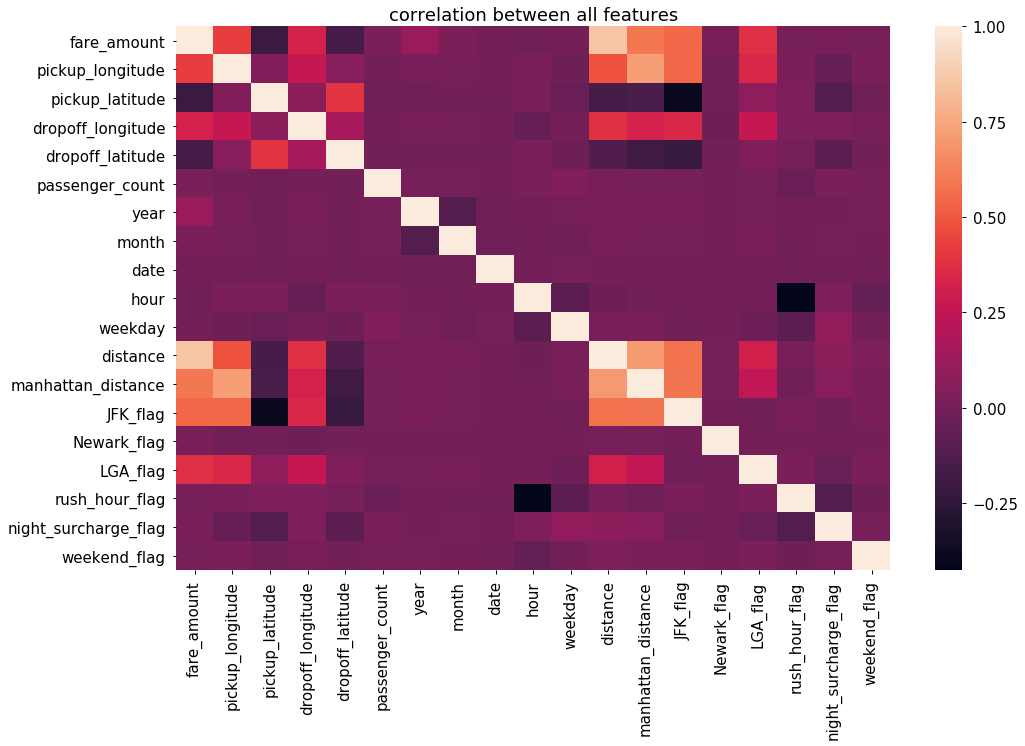

In [12]:
#finding correlations(dependence) between the variables
corr_matrix = train.corr()
f, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(corr_matrix)
ax.set_title("correlation between all features")
figure = ax.get_figure()    
figure.savefig('heatmap.png')

In [69]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

submissionPath = '/home/urmil/Desktop/submission_linear.csv'

# train data
df_x = train.loc[:, 'pickup_longitude':]
# df_x = df_x.drop(columns = 'month')
# df_x = df_x.drop(columns = 'date')
# df_x = df_x.drop(columns = 'weekday')
# df_x = df_x.drop(columns = 'passenger_count')
# df_x = df_x.drop(columns = 'rush_hour_flag')
df_x = df_x.drop(columns = 'manhattan_distance')
# df_x = df_x.drop(columns = 'distance')
df_y = train['fare_amount']

print(df_x.head(1))

# scaling the training data
scaler = preprocessing.StandardScaler().fit(df_x)
df_x = scaler.transform(df_x)

# test data
test_x = test.loc[:, 'pickup_longitude':]
# test_x = test_x.drop(columns = 'month')
# test_x = test_x.drop(columns = 'date')
# test_x = test_x.drop(columns = 'weekday')
# test_x = test_x.drop(columns = 'passenger_count')
# test_x = test_x.drop(columns = 'rush_hour_flag')
test_x = test_x.drop(columns = 'manhattan_distance')
# test_x = test_x.drop(columns = 'distance')

# scaling the testing data
test_x = scaler.transform(test_x)

# Create linear regression model
reg = linear_model.LinearRegression()

#spliting training, testing data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 3)

#cross validation
print('cross validation using shufflesplit')
cross_val_generator = ShuffleSplit()
print(cross_val_score(reg, x_train, y_train, cv = cross_val_generator))

# Train the model using the training sets
reg.fit(x_train, y_train)

#printing coofficients
print('coofficients')
print (reg.coef_)

ans = reg.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)


# Make predictions using the testing set
pred_y = reg.predict(test_x)

# Generating output file
pred_y = pd.Series(pred_y, name = 'fare_amount')
submission = pd.DataFrame(data=test['key'])
submission['fare_amount'] = pred_y
print(submission.head())
submission.to_csv(submissionPath, sep='\t', index = False)

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0           -73.994           40.729            -73.992            40.749   

   passenger_count  year  month  date  hour  weekday  distance  JFK_flag  \
0                1  2012      9    10    19        0     1.384         0   

   Newark_flag  LGA_flag  rush_hour_flag  night_surcharge_flag  weekend_flag  
0            0         0               0                     0             1  
cross validation using shufflesplit
[0.78121818 0.76470584 0.78106805 0.77791301 0.76826154 0.77707811
 0.76397412 0.79178959 0.76348416 0.74422179]
coofficients
[-6.68163941e-01 -3.28956069e-01 -4.15954356e-01 -2.67250283e-01
  5.30631366e-02  1.02315475e+00  2.41100940e-01  5.44368038e-03
 -4.68759818e-03 -6.00733474e-02  7.22650908e+00  1.27494389e+00
  5.27609051e-02  1.72280646e+00 -9.15381578e-02 -3.95396113e-01
 -1.80900068e-01]
mean square error
20.126819623601328
root mean square error
4.486292413965159
                

In [70]:
submissionPath = '/home/urmil/Desktop/submission_lasso.csv'

# Create lasso regression model
reg = linear_model.Lasso(alpha=0.1)

#cross validation
print('cross validation using shufflesplit')
cross_val_generator = ShuffleSplit()
print(cross_val_score(reg, x_train, y_train, cv = cross_val_generator))

# Train the model using the training sets
reg.fit(x_train, y_train)

#printing coofficients
print('coofficients')
print (reg.coef_)

ans = reg.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)

# root means square error
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)


# Make predictions using the testing set
pred_y = reg.predict(test_x)

# Generating output file
pred_y = pd.Series(pred_y, name = 'fare_amount')
submission = pd.DataFrame(data=test['key'])
submission['fare_amount'] = pred_y
print(submission.head())
submission.to_csv(submissionPath, sep='\t', index = False)

cross validation using shufflesplit
[0.73789049 0.74321522 0.75907813 0.75403206 0.74579168 0.76427329
 0.80260958 0.75613983 0.7448366  0.77877846]
coofficients
[-0.30318146 -0.36492929 -0.19692787 -0.27697082  0.          0.91392462
  0.13130353  0.          0.         -0.          7.11621942  0.94835368
  0.          1.47739475 -0.         -0.28903654 -0.07382952]
mean square error
20.298215814259326
root mean square error
4.505354127508661
                           key  fare_amount
0  2015-01-27 13:08:24.0000002    10.481561
1  2015-01-27 13:08:24.0000003    11.569282
2  2011-10-08 11:53:44.0000002     5.899869
3  2012-12-01 21:12:12.0000002     8.104551
4  2012-12-01 21:12:12.0000003    14.363075


In [15]:
# http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

submissionPath = '/home/urmil/Desktop/submission_neighbors.csv'

# Create Knearest Neighbor regression model
neighbors = KNeighborsRegressor(n_neighbors=10, n_jobs=7)

#cross validation
cross_val_generator = ShuffleSplit()
print(cross_val_score(neighbors, x_train, y_train, cv = cross_val_generator))

# Train the model using the training sets
neighbors.fit(x_train,y_train)

ans = neighbors.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)

# root means square error
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)

# Make predictions using the testing set
pred_y = neighbors.predict(test_x)

# Generating output file
pred_y = pd.Series(pred_y, name = 'fare_amount')
submission = pd.DataFrame(data=test['key'])
submission['fare_amount'] = pred_y
print(submission.head())
submission.to_csv(submissionPath, sep='\t', index = False)

[0.835768   0.81708776 0.85242089 0.83462009 0.84433577 0.84621476
 0.83251573 0.83987778 0.83871048 0.83303371]
mean square error
13.742912777565195
root mean square error
3.7071434794953912
                           key  fare_amount
0  2015-01-27 13:08:24.0000002         9.90
1  2015-01-27 13:08:24.0000003         9.80
2  2011-10-08 11:53:44.0000002         5.14
3  2012-12-01 21:12:12.0000002         7.54
4  2012-12-01 21:12:12.0000003        15.35


In [16]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

submissionPath = '/home/urmil/Desktop/submission_forest.csv'

# Create random forest regression model
forest = RandomForestRegressor(n_estimators = 100, n_jobs=7)

# cross validation
cross_val_generator = ShuffleSplit()
print(cross_val_score(forest, x_train, y_train, cv = cross_val_generator))
forest.fit(x_train,y_train)

ans = forest.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)

# Make predictions using the testing set
pred_y = forest.predict(test_x)

# Generating output file
pred_y = pd.Series(pred_y, name = 'fare_amount')
submission = pd.DataFrame(data=test['key'])
submission['fare_amount'] = pred_y
print(submission.head())
submission.to_csv(submissionPath, sep='\t', index = False)

[0.88202701 0.86614974 0.86987728 0.87667004 0.88033275 0.87821459
 0.88234554 0.87447912 0.88702921 0.87906993]
mean square error
10.456469837063661
root mean square error
3.2336465232093103
                           key  fare_amount
0  2015-01-27 13:08:24.0000002        9.595
1  2015-01-27 13:08:24.0000003       10.825
2  2011-10-08 11:53:44.0000002        4.260
3  2012-12-01 21:12:12.0000002        8.822
4  2012-12-01 21:12:12.0000003       14.850


In [51]:
#XGBoost
import xgboost as xgb

submissionPath = '/home/urmil/Desktop/submission_xgb.csv'

#Creating XGB regressor
XGB = xgb.XGBRegressor(n_estimators=100, learning_rate=0.09, subsample=0.75, max_depth=6, n_jobs = 7)

#cross validation
cross_val_generator = ShuffleSplit()
print(cross_val_score(XGB, x_train, y_train, cv = cross_val_generator))
XGB.fit(x_train,y_train)

ans = XGB.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)
# root mean square error
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)

# Make predictions using the testing set
pred_y = XGB.predict(test_x)

# Generating output file
pred_y = pd.Series(pred_y, name = 'fare_amount')
submission = pd.DataFrame(data=test['key'])
submission['fare_amount'] = pred_y
print(submission.head())
submission.to_csv(submissionPath, sep='\t', index = False)

[0.87503839 0.86526447 0.87935678 0.86332068 0.87087456 0.87719242
 0.88369936 0.87980905 0.88406469 0.88034938]
mean square error
10.428950154609382
root mean square error
3.229388510942804
                           key  fare_amount
0  2015-01-27 13:08:24.0000002    10.905916
1  2015-01-27 13:08:24.0000003    11.245283
2  2011-10-08 11:53:44.0000002     4.721961
3  2012-12-01 21:12:12.0000002     8.400651
4  2012-12-01 21:12:12.0000003    15.716603


In [71]:
#LGBM
import lightgbm as lgbm

submissionPath = '/home/urmil/Desktop/submission_lgbm.csv'

# creating LGBM regressor
LGBM = lgbm.LGBMRegressor(n_estimators=100, learning_rate=0.3, subsample=0.75, n_jobs = 7)

# cross validation
cross_val_generator = ShuffleSplit()
print(cross_val_score(LGBM, x_train, y_train, cv = cross_val_generator))
LGBM.fit(x_train,y_train)

ans = LGBM.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)

# root means square error
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)

# Make predictions using the testing set
pred_y = LGBM.predict(test_x)

# Generating output file
pred_y = pd.Series(pred_y, name = 'fare_amount')
submission = pd.DataFrame(data=test['key'])
submission['fare_amount'] = pred_y
print(submission.head())
submission.to_csv(submissionPath, sep='\t', index = False)

[0.8765351  0.88273903 0.87587118 0.8768344  0.88262716 0.88345837
 0.89495495 0.88448062 0.88385099 0.89195403]
mean square error
9.906466946740482
root mean square error
3.147454042037863
                           key  fare_amount
0  2015-01-27 13:08:24.0000002    10.655714
1  2015-01-27 13:08:24.0000003    11.121943
2  2011-10-08 11:53:44.0000002     4.657478
3  2012-12-01 21:12:12.0000002     8.193067
4  2012-12-01 21:12:12.0000003    14.911559
